In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
from sklearn.model_selection import cross_val_score


import os

os.environ["PATH"] += os.pathsep + 'C:\\Program Files\\Graphviz\\bin\\'
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from IPython.display import HTML

style = "<style>svg{width:100% !important;height:100% !important;}</style>"
HTML(style)

In [3]:
from zipfile import ZipFile

zip_file = ZipFile('titanic.zip')
dfs = {text_file.filename: pd.read_csv(zip_file.open(text_file.filename))
       for text_file in zip_file.infolist()
       if text_file.filename.endswith('.csv')}
print(dfs.keys())

dict_keys(['gender_submission.csv', 'test.csv', 'train.csv'])


In [4]:
titanic_data = dfs['train.csv']
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
X = titanic_data.drop(['PassengerId','Survived','Name','Ticket','Cabin'],axis=1)
y = titanic_data.Survived

In [7]:
X = pd.get_dummies(X)

In [8]:
X

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,19.0,0,0,30.0000,1,0,0,0,1
888,3,NaN,1,2,23.4500,1,0,0,0,1
889,1,26.0,0,0,30.0000,0,1,1,0,0


In [9]:
med = titanic_data.groupby(['Sex','Pclass','Survived'], as_index=False)['Age'].transform('median')
X = X.fillna({'Age':med.Age})

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [12]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=3,min_samples_leaf=10,\
                                 min_samples_split=100) #max_depth=4

In [13]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=10,
                       min_samples_split=100)

In [14]:
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))

0.8087248322147651
0.7762711864406779


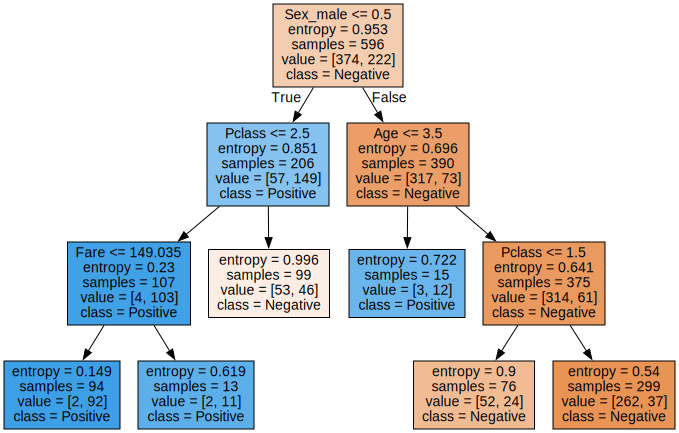

In [15]:
graph = Source(tree.export_graphviz(clf, out_file=None,
                                    feature_names=list(X),
                                    class_names=['Negative', 'Positive'],
                                    filled=True))
display(SVG(graph.pipe(format='svg')))

In [16]:
scores_data = pd.DataFrame()
max_depth_range = range(1,100)
for max_depth in max_depth_range:
    clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=max_depth)
    clf.fit(X_train,y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test,y_test)

    mean_cross_val_score = cross_val_score(clf,X_train,y_train, cv=5).mean()

    temp_score_date = pd.DataFrame({
        'max_depth': [max_depth],
        'train_score': [train_score],
        'test_score': [test_score],
        'cross_val_score':mean_cross_val_score
    })
    #scores_data = scores_data.append(temp_score_date)
    scores_data = pd.concat([scores_data, temp_score_date])

In [17]:
scores_data_long = pd.melt(scores_data,
                           id_vars=['max_depth'],
                           value_vars=['train_score','test_score','cross_val_score'],
                           var_name='set_type',
                           value_name='score')

In [18]:
scores_data_long.shape

(297, 3)

<AxesSubplot:xlabel='max_depth', ylabel='score'>

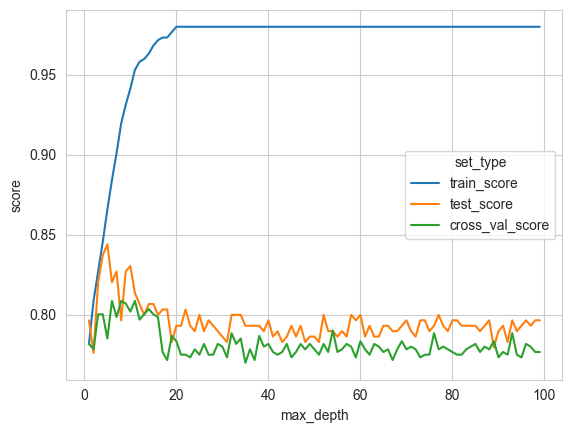

In [19]:
sns.lineplot(x='max_depth',
             y='score',
             hue='set_type',
             data=scores_data_long)
# plt.xlim(0,20)

In [20]:
scores_data_long.query("set_type == 'cross_val_score'").head(20)

,max_depth,set_type,score
198,1,cross_val_score,0.781961
199,2,cross_val_score,0.778585
200,3,cross_val_score,0.800392
201,4,cross_val_score,0.800378
202,5,cross_val_score,0.785266
203,6,cross_val_score,0.808725
204,7,cross_val_score,0.798669
205,8,cross_val_score,0.808711
206,9,cross_val_score,0.807073
207,10,cross_val_score,0.802045


In [21]:
best_clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=10)
best_clf.fit(X_train,y_train)
best_clf.score(X_test, y_test)
# cross_val_score(best_clf, X_test, y_test,cv=5).mean()

0.8305084745762712

In [22]:
clf = tree.DecisionTreeClassifier()

In [23]:
from sklearn.model_selection import GridSearchCV

In [24]:
parametrs = {'criterion':['gini','entropy'], 'max_depth': range(1,30)}

In [25]:
grid_search_cv_clf = GridSearchCV(clf, parametrs, cv=5)

In [26]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30)})

In [27]:
grid_search_cv_clf.best_params_

{'criterion': 'entropy', 'max_depth': 8}

In [28]:
best_clf = grid_search_cv_clf.best_estimator_

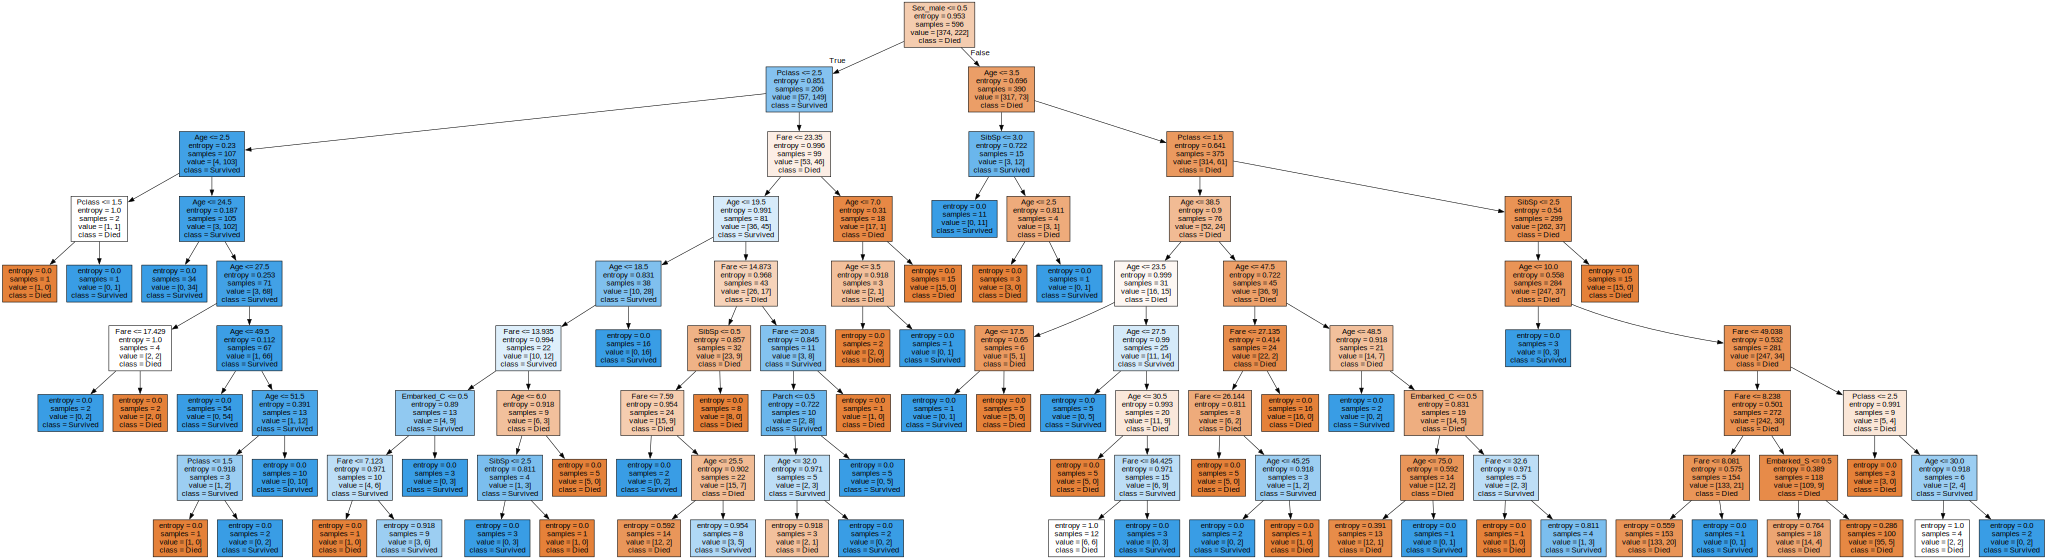

In [29]:
graph = Source(tree.export_graphviz(best_clf, out_file=None,
                                   feature_names=list(X),
                                   class_names=['Died', 'Survived'],
                                   filled = True))
display(SVG(graph.pipe(format='svg')))

In [30]:
best_clf.score(X_test, y_test)

0.7932203389830509

In [31]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [32]:
y_pred = best_clf.predict(X_test)
precision_score(y_test, y_pred, average='macro')

0.7877741872307089

In [33]:
recall_score(y_test, y_pred)

0.7083333333333334

In [3]:
y_predicted_prob = best_clf.predict_proba(X_test)


NameError: name 'best_clf' is not defined

In [2]:
pd.Series(y_predicted_prob[:,1]).hist()
y_predicted_prob[:,1]

NameError: name 'y_predicted_prob' is not defined

In [36]:
y_pred = np.where(y_predicted_prob[:,1] > 0.8, 1,0)

In [37]:
pre = precision_score(y_test,y_pred)
recall = recall_score(y_test, y_pred)
print('Precision: %.2f' % pre)
print('Recall: %.2f' % recall)

Precision: 0.83
Recall: 0.64


In [38]:
scoredf = pd.DataFrame()
for i in range(10):
    y_pred = np.where(y_predicted_prob[:, 1] > i/10, 1, 0)
    pre = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    tempdf = pd.DataFrame(
        {
            'prob': i/10,
            'Precision': [pre],
            'Recall': [recall]
        }
    )
    scoredf = pd.concat([scoredf,tempdf])

<AxesSubplot:xlabel='prob'>

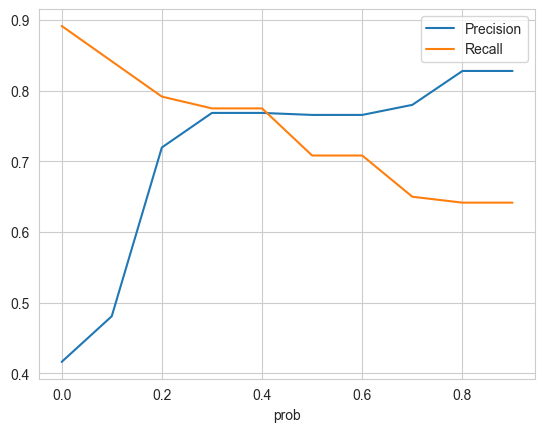

In [39]:
scoredf.set_index('prob').plot()

C:\Users\al\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


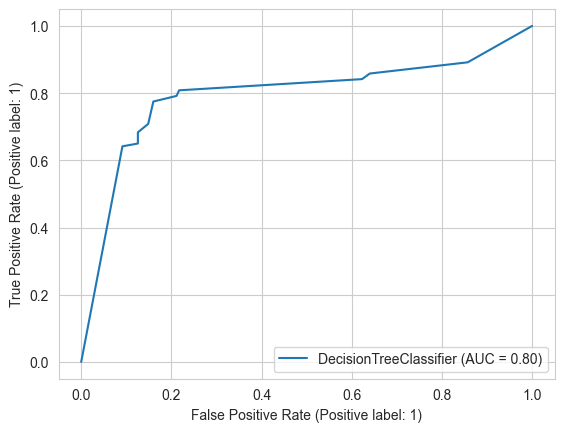

In [40]:
from sklearn import metrics

metrics.plot_roc_curve(best_clf, X_test, y_test)

C:\Users\al\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


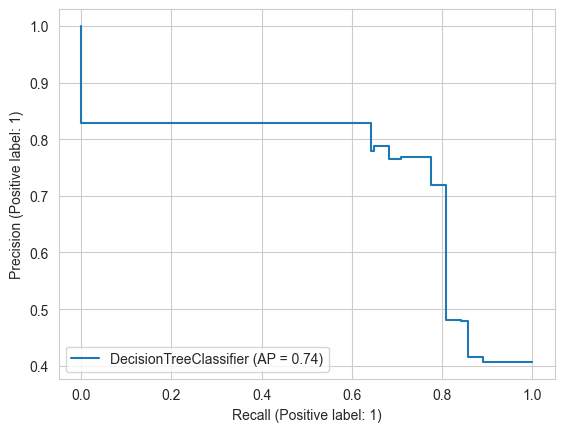

In [41]:
metrics.plot_precision_recall_curve(best_clf, X_test, y_test)

In [42]:
metrics.confusion_matrix(y_test, y_pred)

array([[159,  16],
       [ 43,  77]], dtype=int64)

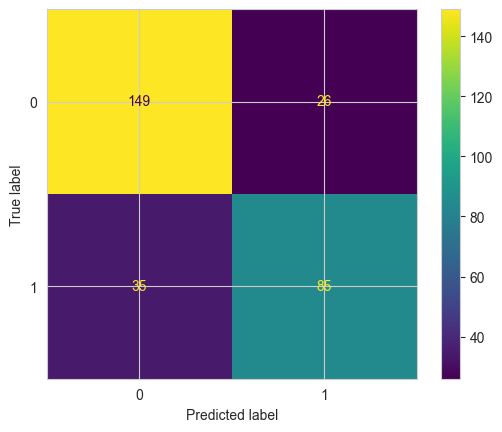

In [43]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_clf, X_test, y_test)

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf_rf = RandomForestClassifier()

In [66]:
parametrs =  {'n_estimators': [10,20,30],
              'max_depth': [2,5,7,10]}
grid_search_cv_clf = GridSearchCV(clf_rf, parametrs, cv=5)

In [67]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 5, 7, 10],
                         'n_estimators': [10, 20, 30]})

In [68]:
grid_search_cv_clf.best_params_

{'max_depth': 5, 'n_estimators': 30}

In [69]:
best_clf = grid_search_cv_clf.best_estimator_
best_clf.score(X_test, y_test)

0.823728813559322

In [71]:
feature_importances = best_clf.feature_importances_

In [72]:
feature_importances_df = pd.DataFrame({'features':list(X_train),
                                       'feature_importances': feature_importances})

In [74]:
feature_importances_df.sort_values('feature_importances',ascending=False)

,features,feature_importances
6,Sex_male,0.248281
5,Sex_female,0.247944
4,Fare,0.144460
1,Age,0.116248
0,Pclass,0.114472
2,SibSp,0.042345
3,Parch,0.031323
7,Embarked_C,0.026174
9,Embarked_S,0.018575
8,Embarked_Q,0.010178


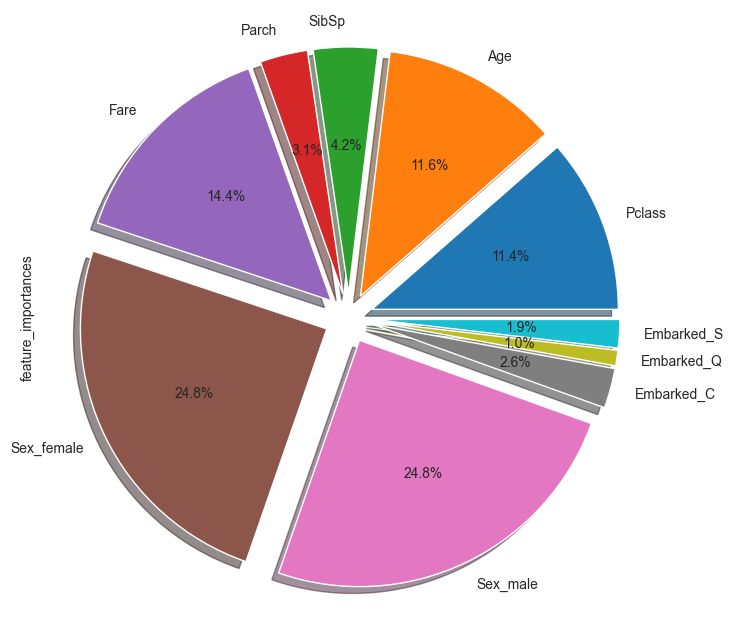

In [75]:

feature_importances_df.plot.pie(
    explode=[0.1]*len(X_train.columns),
    labels = feature_importances_df.features,
    y = 'feature_importances',
    autopct='%1.1f%%',
    shadow=True,
    legend=False,
    figsize=(8, 8));

In [76]:
np.random.seed(0)
rf = RandomForestClassifier(10, max_depth=5)

In [78]:
 data = pd.read_csv('https://raw.githubusercontent.com/sanyathisside/Predicting-Heart-Disease-using-Machine-Learning/master/heart-disease.csv')

In [79]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
